[1/2] step 100  D:0.751  G:1.134
[1/2] step 200  D:0.471  G:1.549
[1/2] step 300  D:1.010  G:1.071
[1/2] step 400  D:0.352  G:1.741
[2/2] step 500  D:0.187  G:2.394
[2/2] step 600  D:0.189  G:2.528
[2/2] step 700  D:0.086  G:3.138
[2/2] step 800  D:0.089  G:3.057
[2/2] step 900  D:0.066  G:3.439
Saved samples to gan_samples.png


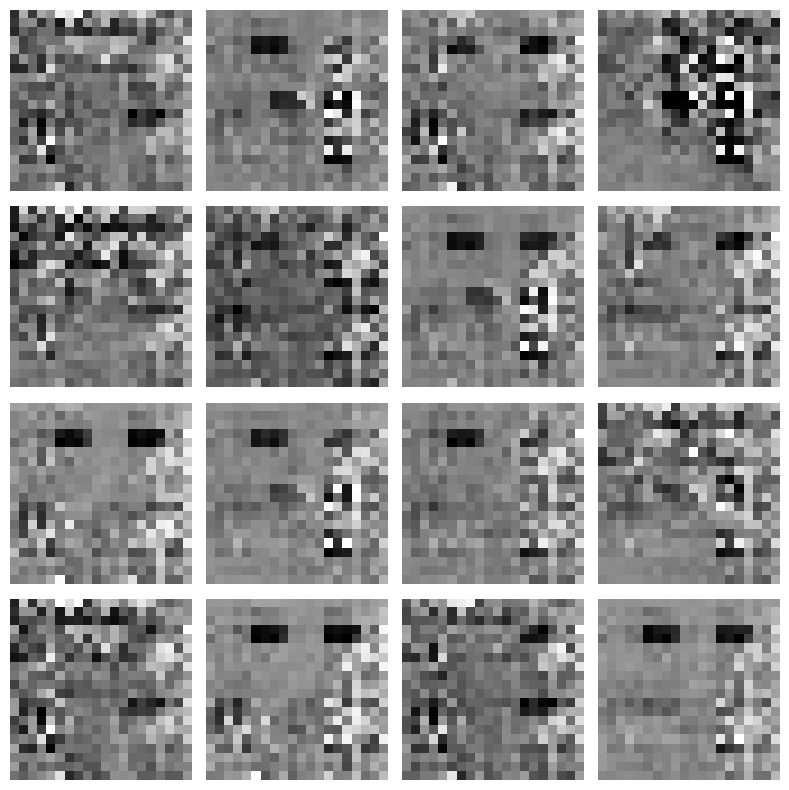

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from helper_lib.model import get_model
from helper_lib.trainer import train_gan
from helper_lib.generator import generate_gan_samples

device = "cuda" if torch.cuda.is_available() else "cpu"

# Data
tfm = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_ds = datasets.MNIST("./data", train=True, download=True, transform=tfm)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=2)

# Model
gan = get_model("GAN", input_channels=1)

# Train quickly
gan, hist = train_gan(gan, train_loader, device=device, epochs=2, lr=2e-4)

# Generate a grid
generate_gan_samples(gan, device=device, num_samples=16, save_path="gan_samples.png")